In [2]:
!pip install kaggle-environments
!pip install termcolor pygame chex

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.8 MB/s eta 0:00:00
  Created wheel for Chessnut: filename=Chessnut-0.3.1-py3-none-any.whl size=10034 sha256=49bd6feb2fc1de7c5a11dc9ec06d22a8e0b6029384e4d7d8a65565eca8d98928
  Stored in directory: /root/.cache/pip/wheels/30/25/8e/c31548e85b37e2434090132a05b1756513c4d0f494defb8244
Successfully built Chessnut


In [3]:
# Подключаем нужные библиотеки
from kaggle_environments import make, evaluate
import numpy as np
import random
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

# Обозначения для ходов:
# 0 - камень
# 1 - бумага
# 2 - ножницы

# Создаем окружение для игры с заданным количеством шагов (ходов)
env = make("rps", configuration={"episodeSteps": 200, "tieRewardThreshold": 1})

/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Loading environment lux_ai_s3 failed: No module named 'gymnax'


In [4]:
%%writefile rock_agent.py

# 1. Агент, который всегда выбирает "камень"
def rock_agent(observation, configuration):
    """
    Агент, который всегда выбирает 'камень' (0).
    """
    return 0

Writing rock_agent.py


In [5]:
%%writefile paper_agent.py
# 2. Агент, который всегда выбирает "бумагу"
def paper_agent(observation, configuration):
    """
    Агент, который всегда выбирает 'бумагу' (1).
    """
    return 1

Writing paper_agent.py


In [6]:
%%writefile scissors_agent.py
# 3. Агент, который всегда выбирает "ножницы"
def scissors_agent(observation, configuration):
    """
    Агент, который всегда выбирает 'ножницы' (2).
    """
    return 2

Writing scissors_agent.py


In [7]:
%%writefile random_choice_agent.py
# 4. Агент случайного выбора
import random
def random_choice_agent(observation, configuration):
    """
    Случайный выбор действия.
    """
    return random.randint(0, 2)

Writing random_choice_agent.py


In [8]:
%%writefile rock_paper_agent.py
# 5. Агент, который случайно выбирает между "камнем" и "бумагой"
import random
def rock_paper_agent(observation, configuration):
    """
    Случайно выбирает между 'камнем' (0) и 'бумагой' (1).
    """
    return random.randint(0, 1)

Writing rock_paper_agent.py


In [9]:
%%writefile paper_scissors_agent.py
# 6. Агент, который случайно выбирает между "бумагой" и "ножницами"
import random
def paper_scissors_agent(observation, configuration):
    """
    Случайно выбирает между 'бумагой' (1) и 'ножницами' (2).
    """
    return random.randint(1, 2)

Writing paper_scissors_agent.py


In [10]:
%%writefile copy_opponent_agent.py
# 7. Агент, который копирует последний ход оппонента
import random
def copy_opponent_agent(observation, configuration):
    """
    Копирует последний ход противника. Если ход первый, выбирает случайно.
    """
    if observation.step > 0:
        return observation.lastOpponentAction  # копирует предыдущий ход противника
    else:
        return random.randrange(0, configuration.signs)  # случайный ход на первом шаге

Writing copy_opponent_agent.py


In [11]:
%%writefile cycle_agent.py
# 8. Циклический агент
def cycle_agent(observation, configuration):
    """
    Агент, который циклически выбирает 'камень' (0), 'бумагу' (1), 'ножницы' (2).
    """
    if observation.step == 0:
        return 0  # Начинаем с 'камня'
    else:
        # Циклически увеличиваем действие на 1 по модулю 3
        return (observation.step) % 3

Writing cycle_agent.py


In [12]:
%%writefile biased_scissors_agent.py
# 9. Агент, который чаще выбирает "ножницы" (с вероятностью 70%)

import random
def biased_scissors_agent(observation, configuration):
    """
    Агент, который выбирает 'ножницы' с вероятностью 70%, иначе выбирает случайно между 'камнем' и 'бумагой'.
    """

    if random.random() < 0.7:
        return 2  # 'ножницы'
    else:
        return random.choice([0, 1])  # 'камень' или 'бумага'

Writing biased_scissors_agent.py


In [13]:
%%writefile losing_agent.py
# 10. Агент, который всегда проигрывает
def losing_agent(observation, configuration):
    """
    Агент, который всегда выбирает ход, проигрывающий последнему ходу противника.
    Если это первый ход, выбирает 'камень' (0).
    """
    if observation.step == 0:
        return 0
    else:
        # Выбираем ход, который проигрывает последнему ходу противника
        return (observation.lastOpponentAction + 2) % 3

Writing losing_agent.py


In [14]:
%%writefile Jonson_agent.py
# 11. Агент Джонсона с анализом паттернов противника
import numpy as np
import collections
def Jonson_agent(observation, configuration):
    """
    Агент с анализом паттернов противника. Использует таблицу частот для предсказания.
    """
    k = 2
    global table, action_seq
    if observation.step % 25 == 0:
        action_seq, table = [], collections.defaultdict(lambda: [1, 1, 1])  # обновляет таблицу каждые 25 шагов
    if len(action_seq) <= 2 * k + 1:
        action = int(np.random.randint(3))
        if observation.step > 0:
            action_seq.extend([observation.lastOpponentAction, action])  # добавляет последний ход противника
        else:
            action_seq.append(action)
        return action

    key = ''.join([str(a) for a in action_seq[:-1]])  # ключ на основе последовательности ходов
    table[key][observation.lastOpponentAction] += 1  # обновляет таблицу по ключу

    action_seq[:-2] = action_seq[2:]
    action_seq[-2] = observation.lastOpponentAction
    key = ''.join([str(a) for a in action_seq[:-1]])

    if observation.step < 50:
        next_opponent_action_pred = np.argmax(table[key])  # предсказание по таблице
    else:
        scores = np.array(table[key])
        next_opponent_action_pred = np.random.choice(3, p=scores/scores.sum())

    action = (next_opponent_action_pred + 1) % 3
    if observation.step > 90:
        action = next_opponent_action_pred
    action_seq[-1] = action
    return int(action)

Writing Jonson_agent.py


In [15]:
%%writefile statistical_agent.py
# 12. Агент, который анализирует статистику ходов противника
import random
action_histogram = {}
def statistical_agent(observation, configuration):
    """
    Запоминает ходы противника и выбирает действие, чтобы противодействовать
    наиболее частому ходу противника.
    """
    global action_histogram
    if observation.step == 0:
        action_histogram = {}  # очищает историю в начале
        return random.randint(0, 2)  # случайный ход в начале

    action = observation.lastOpponentAction
    action_histogram[action] = action_histogram.get(action, 0) + 1  # считает ходы противника

    mode_action = max(action_histogram, key=action_histogram.get)  # находит наиболее частый ход
    return (mode_action + 1) % configuration.signs  # возвращает контр-ход

Writing statistical_agent.py


In [16]:
%%writefile even_odd_agent.py
# 13. Агент, который выбирает действие на основе остатка от деления шага на 2
def even_odd_agent(observation, configuration):
    """
    Агент, который выбирает 'камень' на четных шагах и 'бумагу' на нечетных.
    """
    if observation.step % 2 == 0:
        return 0  # 'камень'
    else:
        return 1  # 'бумага'

Writing even_odd_agent.py


In [17]:
# Турнир между агентами
agents = ['rock_agent', 'paper_agent', 'scissors_agent',
          'copy_opponent_agent', 'random_choice_agent',
          'statistical_agent', 'Jonson_agent', 'cycle_agent',
          'rock_paper_agent', 'paper_scissors_agent',
          'even_odd_agent', 'biased_scissors_agent',
          'losing_agent']

# Добавляем .py к каждому агенту
agents_py = [i + ".py" for i in agents]
n_agents = len(agents)

# Инициализируем матрицу результатов
scores = np.zeros((n_agents, n_agents))

# Играем каждый агент против каждого
for i in range(n_agents):
    for j in range(i + 1, n_agents):
        result = evaluate("rps", [agents_py[i], agents_py[j]], configuration={"episodeSteps": 200, "tieRewardThreshold": 1}, num_episodes=1)
        scores[i][j] = result[0][0]  # сохраняем результат для агента i
        scores[j][i] = result[0][1]  # сохраняем результат для агента j

# Определяем победителя
vic = []
for i in range(n_agents):
    cnt_vic = sum(1 for j in range(n_agents) if scores[i][j] > 0)  # считаем победы агента
    vic.append(cnt_vic)

# Определяем индексы победителей
i_victors = [i for i, v in enumerate(vic) if v == max(vic)]
if len(i_victors) > 1:
    print("The winners are", '\n', *[agents_py[i] for i in i_victors], "!")
else:
    print("The winner is", agents_py[i_victors[0]], "!")

The winner is statistical_agent.py !


In [18]:
df_scores = pd.DataFrame(scores, index=agents, columns=agents) # строим сводную таблицу итогов турнира
df_scores

rock_agent  paper_agent  scissors_agent  \
rock_agent                    0.0       -199.0           199.0   
paper_agent                 199.0          0.0          -199.0   
scissors_agent             -199.0        199.0             0.0   
copy_opponent_agent           0.0         -1.0             1.0   
random_choice_agent           6.0         -4.0            17.0   
statistical_agent           197.0        197.0           198.0   
Jonson_agent                 51.0         28.0            19.0   
cycle_agent                   0.0         -1.0             1.0   
rock_paper_agent             88.0       -102.0           -27.0   
paper_scissors_agent         19.0        112.0           -96.0   
even_odd_agent               99.0       -100.0             1.0   
biased_scissors_agent       -91.0        112.0            -1.0   
losing_agent               -198.0       -199.0          -197.0   

                       copy_opponent_agent  random_choice_agent  \
rock_agent                             0.0                 -6.0   
paper_agent                            1.0                  4.0   
scissors_agent                        -1.0                -17.0   
copy_opponent_agent                    0.0                  3.0   
random_choice_agent                   -3.0                  0.0   
statistical_agent                     40.0                  8.0   
Jonson_agent                           6.0                -10.0   
cycle_agent                          199.0                  8.0   
rock_paper_agent                       0.0                 -8.0   
paper_scissors_agent                   0.0                 24.0   
even_odd_agent                        -1.0                -22.0   
biased_scissors_agent                 -9.0                  3.0   
losing_agent                         199.0                 -2.0   

                       statistical_agent  Jonson_agent  cycle_agent  \
rock_agent                        -197.0         -51.0          0.0   
paper_agent                       -197.0         -28.0          1.0   
scissors_agent                    -198.0         -19.0         -1.0   
copy_opponent_agent                -40.0          -6.0       -199.0   
random_choice_agent                 -8.0          10.0         -8.0   
statistical_agent                    0.0           1.0          0.0   
Jonson_agent                        -1.0           0.0         30.0   
cycle_agent                          0.0         -30.0          0.0   
rock_paper_agent                   -75.0         -16.0          5.0   
paper_scissors_agent              -114.0         -13.0         -4.0   
even_odd_agent                     -99.0         -44.0          0.0   
biased_scissors_agent             -105.0          16.0          3.0   
losing_agent                      -196.0         -44.0        198.0   

                       rock_paper_agent  paper_scissors_agent  even_odd_agent  \
rock_agent                        -88.0                 -19.0           -99.0   
paper_agent                       102.0                -112.0           100.0   
scissors_agent                     27.0                  96.0            -1.0   
copy_opponent_agent                 0.0                   0.0             1.0   
random_choice_agent                 8.0                 -24.0            22.0   
statistical_agent                  75.0                 114.0            99.0   
Jonson_agent                       16.0                  13.0            44.0   
cycle_agent                        -5.0                   4.0             0.0   
rock_paper_agent                    0.0                 -39.0             4.0   
paper_scissors_agent               39.0                   0.0            65.0   
even_odd_agent                     -4.0                 -65.0             0.0   
biased_scissors_agent              -6.0                  62.0             6.0   
losing_agent                      -61.0                 -34.0            99.0   

                       biased

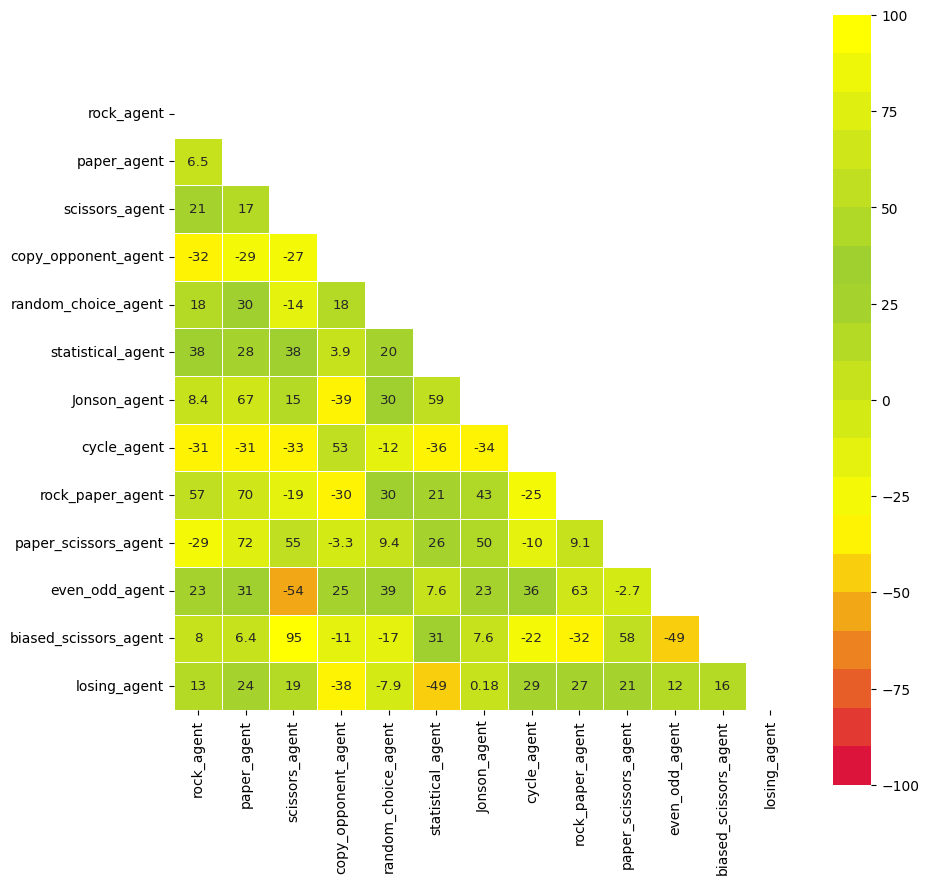

In [19]:
# Построение дополнительной визуализации

cmatrix = df_scores.corr() * 100
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'yellow', 'yellowgreen', 'yellow'], 20)
mask = np.triu(np.ones(cmatrix.shape[0]), k=0)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ax=ax, data=cmatrix, cmap=cmap, vmin=-100, vmax=100, linewidths=.5, square=True, annot=True, mask=mask, annot_kws={'size':35 / math.sqrt(cmatrix.shape[0])})
plt.show()

In [20]:
# Создаем окружение для игры с заданным количеством шагов (ходов)
env = make("rps", configuration={"episodeSteps": 100, "tieRewardThreshold": 1})

# Здесь загружаем созданных агентов
# (предполагается, что файлы агентов уже созданы, как показано ранее)

# Дополнительные эксперименты: запуск определенных агентов против друг друга

def agent_vs_agent(player_1, player_2):  # функция для запуска визуализации игры между двумя агентами
  env.run([player_1 + ".py", player_2 + ".py"])
  env.render(mode="ipython", width=500, height=400)
  print("Результат " + player_1 + " против " + player_2 + ":", evaluate("rps", [player_1 + ".py", player_2 + ".py"], configuration={"episodeSteps": 1000, "tieRewardThreshold": 1}))

# Запускаем игру между агентом Jonson и другими агентами
for agent in agents:
  agent_vs_agent(agent, "Jonson_agent")

Результат rock_agent против Jonson_agent: [[-19.0, 19.0]]


Результат paper_agent против Jonson_agent: [[-17.0, 17.0]]


Результат scissors_agent против Jonson_agent: [[-28.0, 28.0]]


Результат copy_opponent_agent против Jonson_agent: [[18.0, -18.0]]


Результат random_choice_agent против Jonson_agent: [[-20.0, 20.0]]


Результат statistical_agent против Jonson_agent: [[-45.0, 45.0]]


Результат Jonson_agent против Jonson_agent: [[6.0, -6.0]]


Результат cycle_agent против Jonson_agent: [[-6.0, 6.0]]


Результат rock_paper_agent против Jonson_agent: [[-17.0, 17.0]]


Результат paper_scissors_agent против Jonson_agent: [[46.0, -46.0]]


Результат even_odd_agent против Jonson_agent: [[-58.0, 58.0]]


Результат biased_scissors_agent против Jonson_agent: [[22.0, -22.0]]


Результат losing_agent против Jonson_agent: [[-18.0, 18.0]]
